In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [35]:
df_train = pd.read_csv("flood/train.csv")
df_train

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,1117952,3,3,4,10,4,5,5,7,10,...,7,8,7,2,2,1,4,6,4,0.495
1117953,1117953,2,2,4,3,9,5,8,1,3,...,9,4,4,3,7,4,9,4,5,0.480
1117954,1117954,7,3,9,4,6,5,9,1,3,...,5,5,5,5,6,5,5,2,4,0.485
1117955,1117955,7,3,3,7,5,2,3,4,6,...,6,8,5,3,4,6,7,6,4,0.495


In [36]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [37]:
df_train.describe(include="all")

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


In [38]:
missing_values = df_train.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [39]:
# Cek Outlier
# 
# for feature in df_train.columns:
#     plt.figure(figsize=(10,6))
#     sns.boxplot(x=df_train[feature])
#     plt.title(f"blox plot of {feature}")
#     plt.show()

In [40]:
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3 -Q1

lower_fance = Q1 - 1.5 * IQR
upper_fance = Q3 + 1.5 * IQR

condition = ~((df_train < lower_fance) | (df_train > upper_fance)).any(axis=1)
df = df_train.loc[condition, df_train.columns]

In [41]:
# for feature in df.columns:
#     plt.figure(figsize=(10,6))
#     sns.boxplot(x=df[feature])
#     plt.title(f"blox plot of {feature}")
#     plt.show()



<Axes: xlabel='Deforestation', ylabel='Count'>

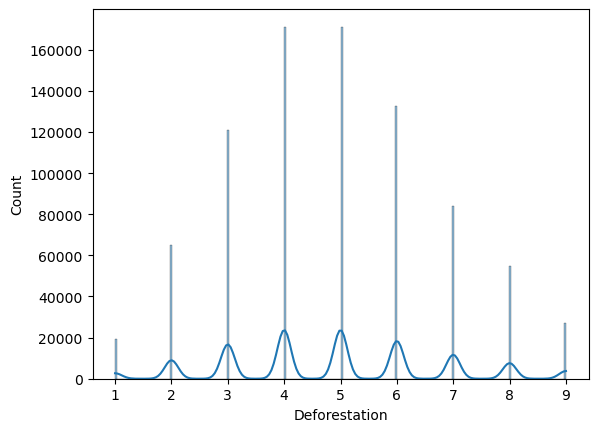

In [42]:
sns.histplot(df["Deforestation"], kde=True)


In [43]:
numeric_features = df.select_dtypes(include="number").columns
scaler =StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])
df

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,-1.732268,0.058002,1.550328,0.064284,1.683351,0.543778,-0.463123,-0.465651,-0.964121,-0.969523,...,0.071054,-0.967507,-0.957953,0.046708,-0.454798,1.062768,0.068580,1.048732,-0.959319,-1.122956
1,-1.732265,0.570302,1.050410,-0.468118,-0.467537,1.549104,1.573782,-0.998066,0.051310,-0.463606,...,1.140054,-1.470036,-2.465862,-0.957783,0.052873,-0.960584,-0.999582,-0.460240,-0.959319,-1.020641
2,-1.732262,0.570302,0.050574,0.596686,1.145629,-0.964210,1.064556,-2.062896,0.051310,-0.463606,...,1.140054,-0.967507,1.052592,0.046708,0.560545,1.568606,-1.533663,-0.963231,-0.959319,0.616394
3,-1.732259,-0.966598,-0.449345,0.596686,0.070185,-0.461547,1.573782,-0.465651,1.066740,0.548227,...,-1.532446,-0.464978,1.052592,-0.455538,-0.454798,0.556930,0.068580,1.048732,0.043751,0.718708
4,-1.732256,0.058002,-0.949263,-1.532923,0.607907,-0.461547,-0.463123,-0.998066,-0.964121,-0.969523,...,-1.532446,-1.470036,0.549956,0.548954,-0.454798,-1.972260,-1.533663,-0.963231,0.043751,-1.736844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117951,1.732011,0.570302,-0.449345,1.661491,-0.467537,-0.461547,-0.972350,-0.998066,-0.456406,2.571894,...,0.071054,-0.967507,-0.455317,-1.460029,2.591231,-0.960584,0.602661,-0.460240,0.043751,-0.099809
1117953,1.732017,-1.478898,-1.449181,-0.468118,-1.005258,2.051766,0.046103,1.664008,-1.979552,-0.969523,...,2.209054,-0.464978,-0.455317,-0.957783,1.068217,-0.454746,2.204904,-0.460240,0.043751,-0.406753
1117954,1.732020,1.082602,-0.949263,2.193893,-0.467537,0.543778,0.046103,2.196423,-1.979552,-0.969523,...,0.071054,0.037552,0.047320,0.046708,0.560545,0.051092,0.068580,-1.466222,-0.457784,-0.304438
1117955,1.732024,1.082602,-0.949263,-1.000520,1.145629,0.041116,-1.481576,-0.998066,-0.456406,0.548227,...,0.605554,1.545139,0.047320,-0.957783,-0.454798,0.556930,1.136742,0.545741,-0.457784,-0.099809


<Axes: xlabel='Deforestation', ylabel='Count'>

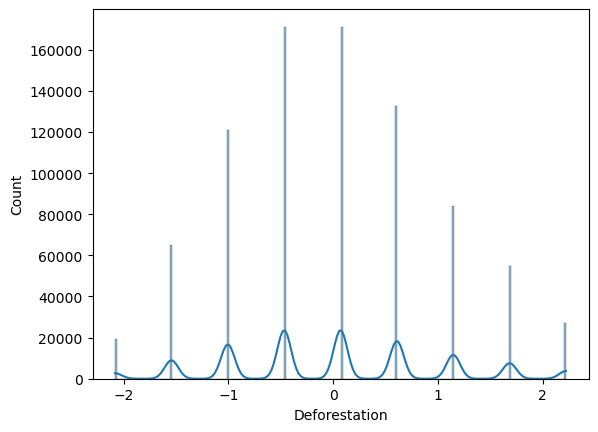

In [44]:
sns.histplot(df["Deforestation"], kde=True)

In [45]:
duplicates = df.duplicated()
     
print("Baris duplikat:")
df[duplicates]

Baris duplikat:


,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability


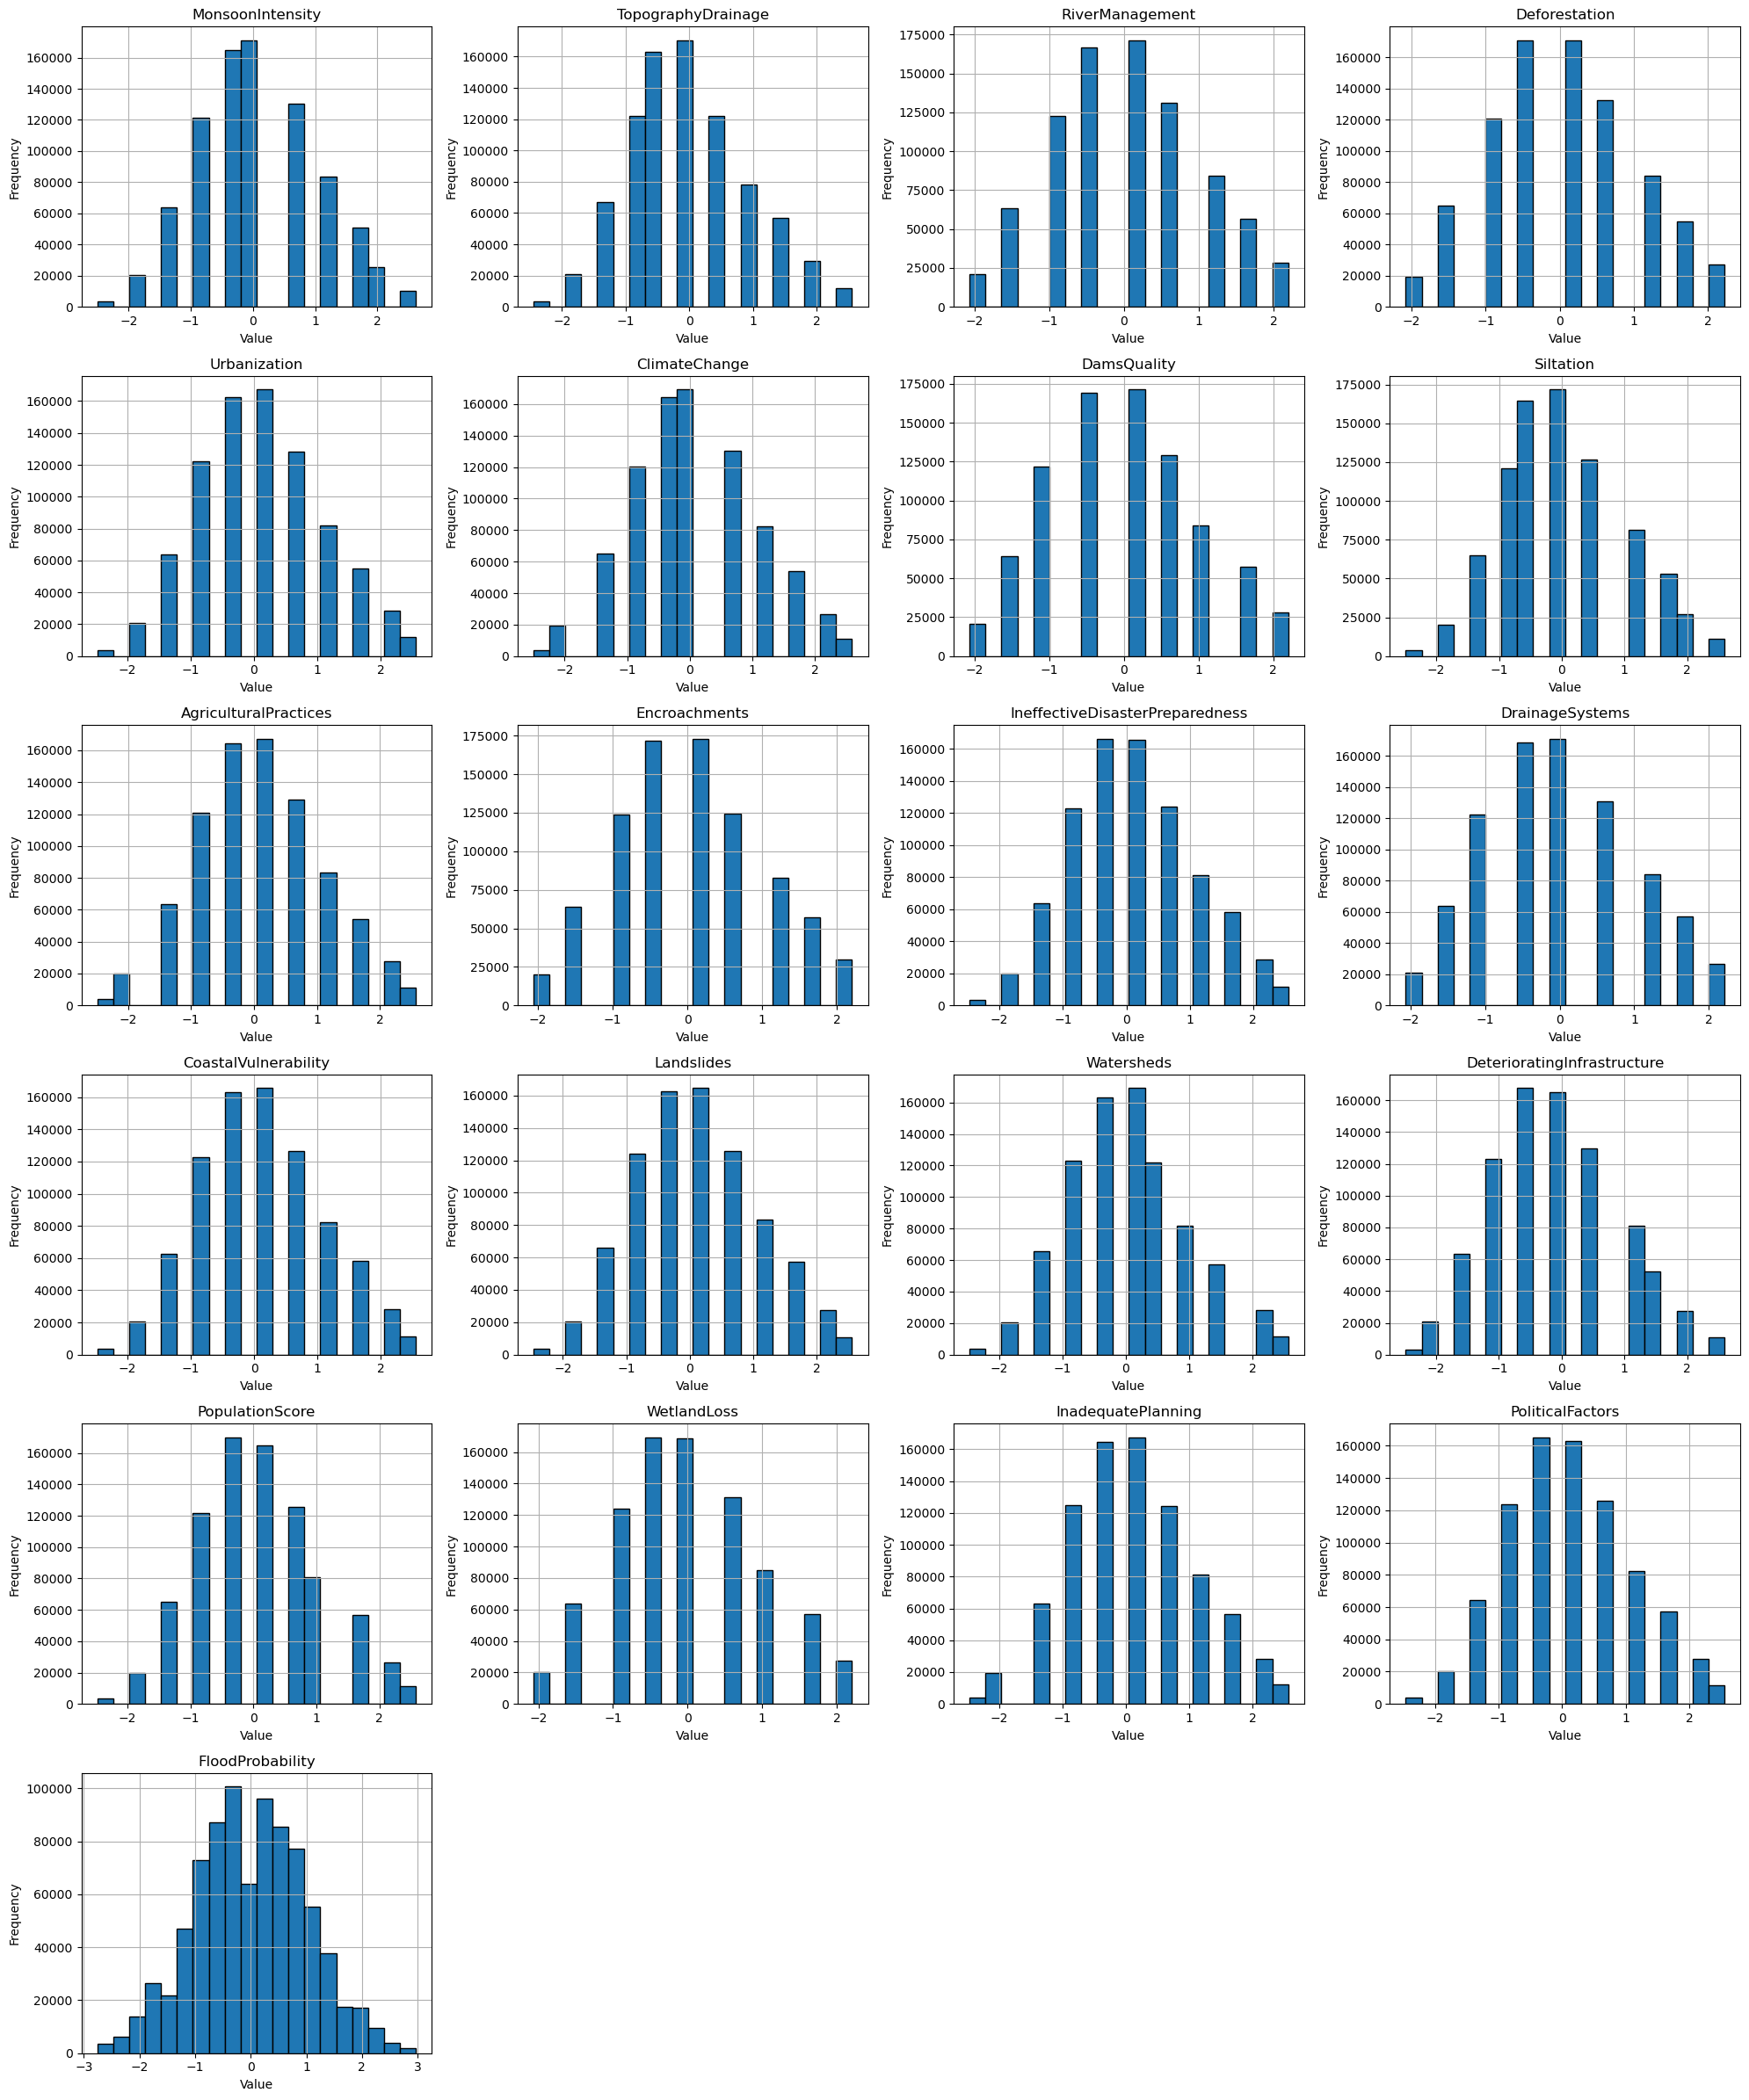

In [46]:
# Menghitung jumlah variabel
num_vars = df.shape[1]
 
# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 4  # Jumlah kolom yang diinginkan
n_rows = -(-num_vars // n_cols)  # Ceiling division untuk menentukan jumlah baris
 
# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
 
# Flatten axes array untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()
 
# Plot setiap variabel
for i, column in enumerate(df.drop(columns=["id"]).columns):
    df[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
 
# Menghapus subplot yang tidak terpakai (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
 
# Menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()

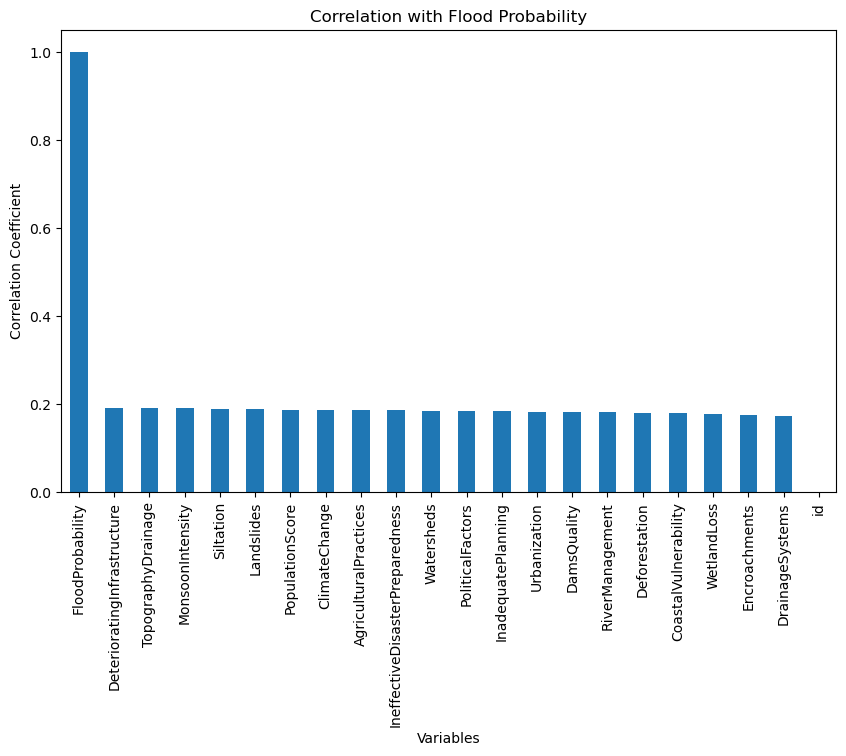

In [47]:
# Menghitung korelasi antara variabel target dan semua variabel lainnya
target_corr = df.corr()['FloodProbability']
 
# (Opsional) Mengurutkan hasil korelasi berdasarkan kekuatan korelasi
target_corr_sorted = target_corr.abs().sort_values(ascending=False)
 
plt.figure(figsize=(10, 6))
target_corr_sorted.plot(kind='bar')
plt.title(f'Correlation with Flood Probability')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.show()

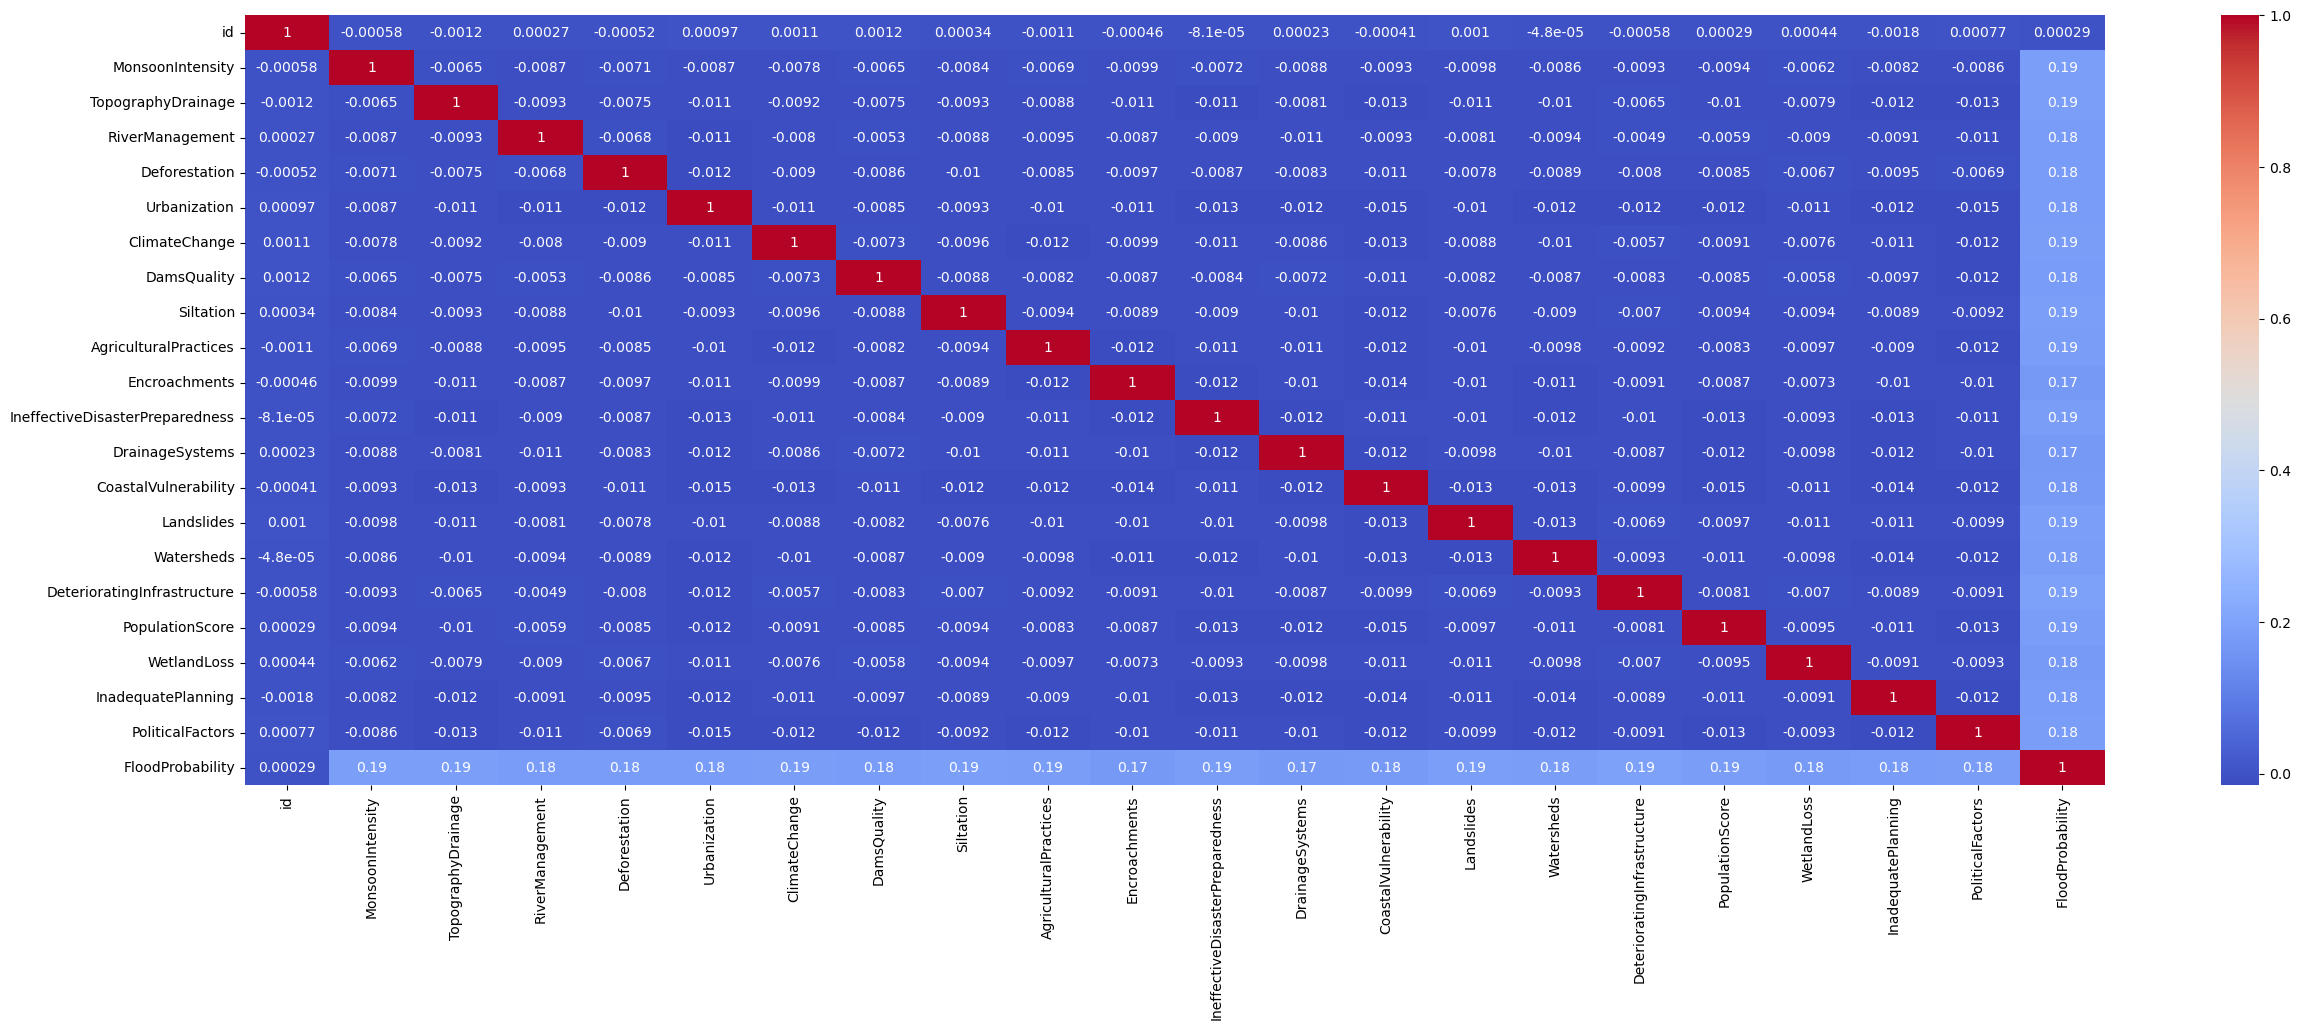

In [48]:
plt.figure(figsize=(30, 10))

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [49]:
import sklearn
from sklearn import datasets
 
# Memisahkan fitur (X) dan target (y)
X = df.drop(columns=['FloodProbability'])
y = df['FloodProbability']
 
from sklearn.model_selection import train_test_split
 
# membagi dataset menjadi training dan testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
 
# menghitung panjang/jumlah data
print("Jumlah data: ",len(X))
# menghitung panjang/jumlah data pada x_test
print("Jumlah data latih: ",len(x_train))
# menghitung panjang/jumlah data pada x_test
print("Jumlah data test: ",len(x_test))

Jumlah data:  845886
Jumlah data latih:  676708
Jumlah data test:  169178


In [56]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor


#lars
lars = linear_model.Lars(n_nonzero_coefs=1).fit(x_train, y_train)
     
pred_lars = lars.predict(x_test)

mae_lars = mean_absolute_error(y_test, pred_lars)
mse_lars = mean_squared_error(y_test, pred_lars)
r2_lars = r2_score(y_test, pred_lars)
 

# Linear Regresion
LR = LinearRegression().fit(x_train, y_train)
 
pred_LR = LR.predict(x_test)
 
mae_LR = mean_absolute_error(y_test, pred_LR)
mse_LR = mean_squared_error(y_test, pred_LR)
r2_LR = r2_score(y_test, pred_LR)

# Graidient Boosting Regressor
GBR = GradientBoostingRegressor(random_state=184)
GBR.fit(x_train, y_train)
 
pred_GBR = GBR.predict(x_test)
 
mae_GBR = mean_absolute_error(y_test, pred_GBR)
mse_GBR = mean_squared_error(y_test, pred_GBR)
r2_GBR = r2_score(y_test, pred_GBR)


data = [
    {'MAE': mae_lars, 'MSE': mse_lars, 'R2': r2_lars},
    {'MAE': mae_LR,   'MSE': mse_LR,   'R2': r2_LR},
    {'MAE': mae_GBR,   'MSE': mse_GBR,   'R2': r2_GBR}
]



df_results = pd.DataFrame(data, index=['Lars','LR', 'GBR'])
df_results

,MAE,MSE,R2
Lars,0.806497,0.998246,0.000764
LR,0.329142,0.171296,0.828534
GBR,0.512672,0.380491,0.619132
